<a href="https://colab.research.google.com/github/WhiteBeyond/AI/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
#import libs
import pandas as pd
from sklearn.linear_model import Perceptron, Ridge
from sklearn.metrics import accuracy_score

In [4]:
weather = pd.read_csv('/content/drive/MyDrive/Weather/HCM.csv', index_col='datetime')
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2021-01-01,HOCHIMINH,29.7,23.0,25.5,30.2,23.0,25.7,16.1,56.5,0.1,...,14.8,7,NaN,2021-01-01T06:11:36,2021-01-01T17:41:57,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"48894099999,48900099999,VVTS"
2021-01-02,HOCHIMINH,31.0,22.0,25.8,31.8,22.0,26.1,17.2,60.0,0.0,...,13.3,5,NaN,2021-01-02T06:11:59,2021-01-02T17:42:29,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48894099999,48900099999,VVTS"
2021-01-03,HOCHIMINH,32.0,22.0,26.9,34.1,22.0,28.2,20.1,67.3,0.0,...,21.1,9,NaN,2021-01-03T06:12:22,2021-01-03T17:43:02,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48894099999,48900099999,VVTS"
2021-01-04,HOCHIMINH,33.0,24.0,27.8,34.6,24.0,28.9,21.3,70.4,2.0,...,17.0,8,NaN,2021-01-04T06:12:44,2021-01-04T17:43:35,0.68,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"48894099999,48900099999,VVTS"
2021-01-05,HOCHIMINH,32.0,24.0,27.4,34.1,24.0,29.2,22.0,73.7,5.0,...,16.7,7,NaN,2021-01-05T06:13:05,2021-01-05T17:44:08,0.72,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"48894099999,48900099999,VVTS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,HOCHIMINH,35.0,28.0,30.9,43.3,32.7,37.0,24.7,70.7,0.0,...,21.1,10,30.0,2023-04-26T05:37:17,2023-04-26T18:05:06,0.19,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48894099999,48900099999,VVTS"
2023-04-27,HOCHIMINH,35.9,28.0,31.3,41.9,32.6,37.5,24.6,69.1,0.1,...,19.8,9,30.0,2023-04-27T05:36:51,2023-04-27T18:05:12,0.23,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48894099999,48900099999,VVTS"
2023-04-28,HOCHIMINH,36.0,28.0,31.2,44.6,32.7,37.4,24.7,69.9,0.1,...,16.8,9,30.0,2023-04-28T05:36:27,2023-04-28T18:05:19,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48894099999,48900099999,VVTS"


In [5]:
#check for NaN values
weather.apply(pd.isnull).sum()/weather.shape[0]

name                0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
precipcover         0.000000
preciptype          0.309412
snow                0.000000
snowdepth           0.000000
windgust            0.389412
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.001176
cloudcover          0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.000000
uvindex             0.000000
severerisk          0.440000
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [6]:
#sorting data
core_weather = weather[['tempmax','tempmin','temp','feelslike','humidity','precip','preciptype',
                        'windspeed','visibility','uvindex','sunrise', 'sunset', 'conditions'
                      ]].copy()
core_weather

,tempmax,tempmin,temp,feelslike,humidity,precip,preciptype,windspeed,visibility,uvindex,sunrise,sunset,conditions
datetime,,,,,,,,,,,,,
2021-01-01,29.7,23.0,25.5,25.7,56.5,0.1,rain,18.4,10.2,7,2021-01-01T06:11:36,2021-01-01T17:41:57,"Rain, Partially cloudy"
2021-01-02,31.0,22.0,25.8,26.1,60.0,0.0,NaN,17.3,10.3,5,2021-01-02T06:11:59,2021-01-02T17:42:29,Partially cloudy
2021-01-03,32.0,22.0,26.9,28.2,67.3,0.0,NaN,11.2,10.1,9,2021-01-03T06:12:22,2021-01-03T17:43:02,Partially cloudy
2021-01-04,33.0,24.0,27.8,28.9,70.4,2.0,rain,16.6,9.9,8,2021-01-04T06:12:44,2021-01-04T17:43:35,"Rain, Partially cloudy"
2021-01-05,32.0,24.0,27.4,29.2,73.7,5.0,rain,11.2,9.7,7,2021-01-05T06:13:05,2021-01-05T17:44:08,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,35.0,28.0,30.9,37.0,70.7,0.0,NaN,18.4,10.1,10,2023-04-26T05:37:17,2023-04-26T18:05:06,Partially cloudy
2023-04-27,35.9,28.0,31.3,37.5,69.1,0.1,rain,20.9,9.9,9,2023-04-27T05:36:51,2023-04-27T18:05:12,"Rain, Partially cloudy"
2023-04-28,36.0,28.0,31.2,37.4,69.9,0.1,rain,22.3,9.7,9,2023-04-28T05:36:27,2023-04-28T18:05:19,"Rain, Partially cloudy"


In [7]:
#recheck NaN value
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

tempmax       0.000000
tempmin       0.000000
temp          0.000000
feelslike     0.000000
humidity      0.000000
precip        0.000000
preciptype    0.309412
windspeed     0.000000
visibility    0.000000
uvindex       0.000000
sunrise       0.000000
sunset        0.000000
conditions    0.000000
dtype: float64

In [8]:
core_weather[pd.isnull(core_weather["preciptype"])]

,tempmax,tempmin,temp,feelslike,humidity,precip,preciptype,windspeed,visibility,uvindex,sunrise,sunset,conditions
datetime,,,,,,,,,,,,,
2021-01-02,31.0,22.0,25.8,26.1,60.0,0.0,NaN,17.3,10.3,5,2021-01-02T06:11:59,2021-01-02T17:42:29,Partially cloudy
2021-01-03,32.0,22.0,26.9,28.2,67.3,0.0,NaN,11.2,10.1,9,2021-01-03T06:12:22,2021-01-03T17:43:02,Partially cloudy
2021-01-06,32.0,24.0,27.9,29.7,68.6,0.0,NaN,11.2,10.3,7,2021-01-06T06:13:26,2021-01-06T17:44:40,Partially cloudy
2021-01-07,34.0,24.0,28.2,29.5,69.3,0.0,NaN,16.0,10.1,9,2021-01-07T06:13:45,2021-01-07T17:45:13,Partially cloudy
2021-01-09,32.0,23.0,27.1,27.5,60.4,0.0,NaN,14.8,9.5,9,2021-01-09T06:14:22,2021-01-09T17:46:18,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-23,36.0,28.0,31.2,38.2,74.1,0.0,NaN,17.7,10.2,10,2023-04-23T05:38:37,2023-04-23T18:04:50,Partially cloudy
2023-04-24,37.0,27.0,31.1,38.0,74.3,0.0,NaN,19.3,9.8,10,2023-04-24T05:38:10,2023-04-24T18:04:55,Partially cloudy
2023-04-25,37.0,28.0,31.3,37.4,70.2,0.0,NaN,18.4,10.1,10,2023-04-25T05:37:43,2023-04-25T18:05:00,Partially cloudy


In [9]:
#replace NaN to '0' 
core_weather["preciptype"] = core_weather["preciptype"].fillna(0)

In [10]:
#convert index to datetime for better search 
core_weather.index = pd.to_datetime(core_weather.index)

<Axes: xlabel='datetime'>

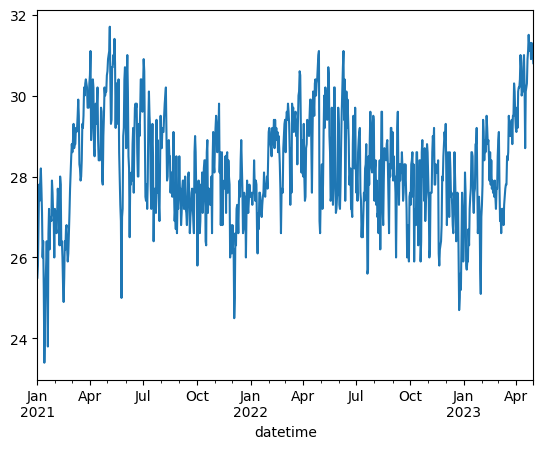

In [11]:
#check for missing data
core_weather["temp"].plot()

In [12]:
core_weather["target"] = core_weather.shift(-1)["temp"]
core_weather = core_weather.iloc[:-1,:].copy()

In [13]:
#train model
reg = Ridge(alpha=.1)
per = Perceptron()
predictors = core_weather.columns[~core_weather.columns.isin(["target","preciptype", "sunrise", "sunset", "conditions"])]
predictors

Index(['tempmax', 'tempmin', 'temp', 'feelslike', 'humidity', 'precip',
       'windspeed', 'visibility', 'uvindex'],
      dtype='object')

In [14]:
train = core_weather.loc[:"2022-12-31"]
test = core_weather.loc["2023-01-01":]

In [15]:
train

,tempmax,tempmin,temp,feelslike,humidity,precip,preciptype,windspeed,visibility,uvindex,sunrise,sunset,conditions,target
datetime,,,,,,,,,,,,,,
2021-01-01,29.7,23.0,25.5,25.7,56.5,0.1,rain,18.4,10.2,7,2021-01-01T06:11:36,2021-01-01T17:41:57,"Rain, Partially cloudy",25.8
2021-01-02,31.0,22.0,25.8,26.1,60.0,0.0,0,17.3,10.3,5,2021-01-02T06:11:59,2021-01-02T17:42:29,Partially cloudy,26.9
2021-01-03,32.0,22.0,26.9,28.2,67.3,0.0,0,11.2,10.1,9,2021-01-03T06:12:22,2021-01-03T17:43:02,Partially cloudy,27.8
2021-01-04,33.0,24.0,27.8,28.9,70.4,2.0,rain,16.6,9.9,8,2021-01-04T06:12:44,2021-01-04T17:43:35,"Rain, Partially cloudy",27.4
2021-01-05,32.0,24.0,27.4,29.2,73.7,5.0,rain,11.2,9.7,7,2021-01-05T06:13:05,2021-01-05T17:44:08,"Rain, Partially cloudy",27.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,29.0,21.6,25.2,25.8,77.9,0.1,rain,9.7,9.0,9,2022-12-27T06:09:16,2022-12-27T17:39:00,"Rain, Partially cloudy",26.3
2022-12-28,32.0,21.0,26.3,26.8,73.0,0.0,0,13.0,8.8,9,2022-12-28T06:09:43,2022-12-28T17:39:32,Partially cloudy,27.6
2022-12-29,32.4,23.9,27.6,29.1,73.7,0.0,0,23.8,9.2,9,2022-12-29T06:10:09,2022-12-29T17:40:04,Partially cloudy,27.2


In [16]:
test

,tempmax,tempmin,temp,feelslike,humidity,precip,preciptype,windspeed,visibility,uvindex,sunrise,sunset,conditions,target
datetime,,,,,,,,,,,,,,
2023-01-01,31.0,23.0,26.5,27.4,67.3,0.2,rain,14.8,9.5,7,2023-01-01T06:11:25,2023-01-01T17:41:42,"Rain, Partially cloudy",26.7
2023-01-02,32.0,23.0,26.7,28.7,79.6,0.9,rain,10.1,10.0,8,2023-01-02T06:11:49,2023-01-02T17:42:14,"Rain, Partially cloudy",28.1
2023-01-03,33.0,24.0,28.1,29.8,73.4,1.6,rain,15.7,9.7,8,2023-01-03T06:12:12,2023-01-03T17:42:47,"Rain, Partially cloudy",27.6
2023-01-04,32.7,24.0,27.6,28.6,64.2,0.3,rain,22.3,10.3,6,2023-01-04T06:12:34,2023-01-04T17:43:20,"Rain, Partially cloudy",25.8
2023-01-05,28.0,24.0,25.8,26.4,72.4,1.1,rain,24.1,10.3,1,2023-01-05T06:12:56,2023-01-05T17:43:53,"Rain, Partially cloudy",25.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25,37.0,28.0,31.3,37.4,70.2,0.0,0,18.4,10.1,10,2023-04-25T05:37:43,2023-04-25T18:05:00,Partially cloudy,30.9
2023-04-26,35.0,28.0,30.9,37.0,70.7,0.0,0,18.4,10.1,10,2023-04-26T05:37:17,2023-04-26T18:05:06,Partially cloudy,31.3
2023-04-27,35.9,28.0,31.3,37.5,69.1,0.1,rain,20.9,9.9,9,2023-04-27T05:36:51,2023-04-27T18:05:12,"Rain, Partially cloudy",31.2


In [26]:
reg.fit(train[predictors], train["target"])
predictions = reg.predict(test[predictors])
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test["target"], predictions)
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined


,actual,predictions
datetime,,
2023-01-01,26.7,26.707345
2023-01-02,28.1,27.025435
2023-01-03,27.6,28.122347
2023-01-04,25.8,27.498292
2023-01-05,25.7,26.053376
...,...,...
2023-04-25,30.9,30.599753
2023-04-26,31.3,30.325682
2023-04-27,31.2,30.574062


In [27]:
error

0.3998229601667186

ValueError: ignored